In [1]:
# Now you can use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. 
# All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

# Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

# Use SQLAlchemy create_engine to connect to your sqlite database.

# Use SQLAlchemy automap_base() to reflect your tables into classes.
#Save a reference to those classes called Station and Measurement.

In [2]:
#Dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, create_session
from sqlalchemy import create_engine, MetaData, Table, Column, ForeignKey, inspect, func
import datetime as dt
import numpy as np
# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float, Date

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn = engine.connect()


In [4]:
#Use SQLALchemy automap_base() to reflect your tables into classes.

Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()


['hawaii_measurement', 'hawaii_station']

In [5]:
#Save a reference to those classes called Station and Measurement.
Station = Base.classes.hawaii_station
Measurement = Base.classes.hawaii_measurement

In [6]:
#Start your engines! Instantiate a session.
session = Session(engine)

In [7]:
#use tab when you put your cursor after the period to be able to see the columns for each class.
Measurement.
Station.

SyntaxError: invalid syntax (<ipython-input-7-cff47c6b6fc6>, line 2)

In [8]:
#Design a query to retrieve the last 12 months of precipitation data
#Select only the date and prcp values

qry1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-12-31').\
        filter(Measurement.date >= '2017-01-01').all()
plot1_pd = pd.DataFrame(data=qry1, columns=["date", "prcp"])
plot1_pd = plot1_pd.set_index('date', drop=True)
plot1_pd.head()


,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


In [9]:
#Create variables to use in our data plot
prcp1 = plot1_pd['prcp']
date1 = plot1_pd.index.values
#date1
#prcp1

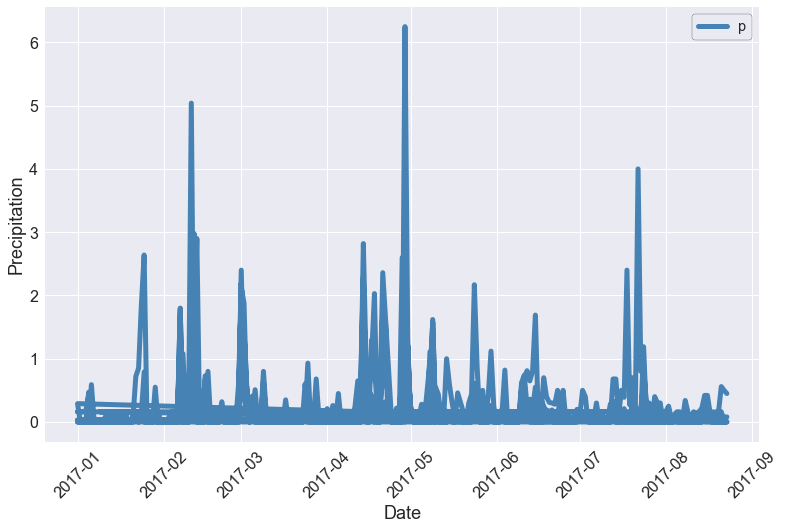

In [40]:
# Create the plot
sns.set()
plt.clf()
plt.figure(figsize=[12.8, 8])
labels = 'precipitation'
x_axis = date1
y_axis = prcp1
plt.xlabel("Date", fontsize=18)
plt.ylabel("Precipitation", fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16, rotation=45)

# Have to plot our chart once again as it doesn't stick after being shown
plot1 = plt.plot(x_axis, y_axis, color='steelblue', linewidth=5)
plt.legend(labels=labels, loc='upper right', fontsize='large', frameon=True, edgecolor='black')
plt.show()

In [17]:
#Use pandas to print the summary statistics for the precipitation data
plot1_pd.describe()

,prcp
count,1397.000000
mean,0.165436
std,0.432264
min,0.000000
25%,0.000000
50%,0.010000
75%,0.160644
max,6.250000


In [18]:
#Design a query to calculate the total number of stations
qry2 = session.query(Station.station).count()
#qry2

In [19]:
#Design a query to find the most active stations
#Do this by listing the stations and observation counts in descending order
qry3 = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())
qry3.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Which station has the highest number of observation counts?  
qry3.limit(1).all()


[('USC00519281', 2772)]

In [24]:
#Design a query to retrieve the last twelve months of temperature observation data (tobs)
qry4 = session.query(Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-12-31').filter(Measurement.date >= '2017-01-01').all()
#qry4

In [25]:
#Use the same query but also filter by station with highest number of temperature observation counts
qry5 = session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-12-31').filter(Measurement.date >= '2017-01-01').\
    filter(Measurement.station=="USC00519281").all()
#qry5

In [26]:
#Put queried data into dataframe so it can be plotted as histogram
plot2_pd = pd.DataFrame(data=qry5, columns=["station", "date", "tobs"])
plot2_pd = plot2_pd.set_index('date', drop=True)
plot2_pd = plot2_pd.drop(columns="station", axis=1)
plot2_pd.head()

,tobs
date,
2017-01-01,72
2017-01-02,70
2017-01-03,64
2017-01-04,63
2017-01-05,63


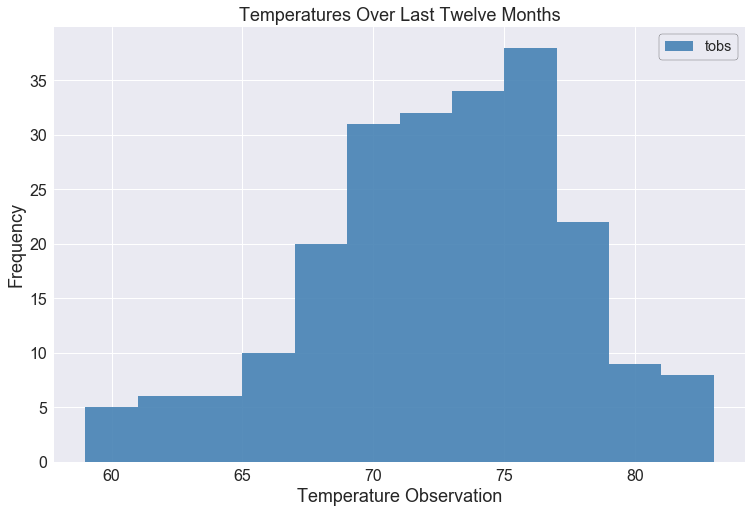

In [50]:
sns.set()
#Plot the results as a histogram with bins=12
x = plot2_pd['tobs']
num_bins = 12
# the histogram of the data
#n, bins, patches = 
plt.figure(figsize=[12.8, 8])
temp_plot = plt.hist(x, num_bins, facecolor='steelblue', label='tobs', alpha=0.9)

plt.xlabel('Temperature Observation', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Temperatures Over Last Twelve Months', fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='large')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [51]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
#and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    select = [Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*select).group_by(Measurement.date).filter(func.strftime("%Y-%m-%d", Measurement.date) >=start_date).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) <=end_date).all()

In [52]:
#Calculate the temps for my trip by running calc_temps function using matching dates from last year
data = calc_temps("2017-05-01", "2017-05-15")

In [53]:
#Put the results into a dataframe so that it can be plotted
plot3_pd = pd.DataFrame(data=data, columns=["date", "tmin", "tavg", "tmax"])
plot3_pd = plot3_pd.set_index('date', drop=True)
#plot2_pd = plot2_pd.drop(columns="station", axis=1)
plot3_pd.head()

,tmin,tavg,tmax
date,,,
2017-05-01,65,72.000000,78
2017-05-02,73,76.500000,79
2017-05-03,70,75.600000,78
2017-05-04,74,76.333333,78
2017-05-05,70,76.333333,79


In [85]:
#Create variables for my plot
p3_date = plot3_pd.index.values
p3_tmin = plot3_pd['tmin']
p3_tavg = plot3_pd['tavg']
p3_tmax = plot3_pd['tmax']
#p3_tavg

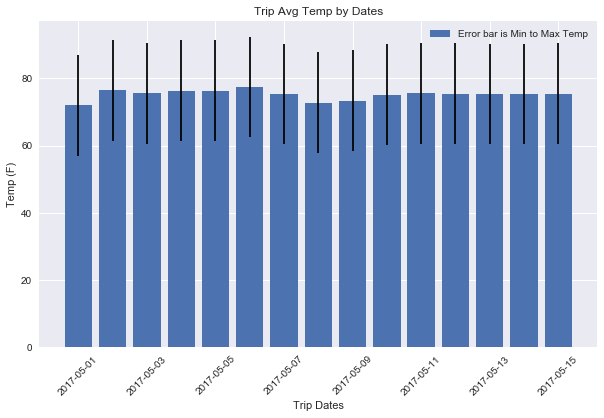

In [109]:
plt.clf()
plt.figure(figsize=[10, 6])
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.

#pmin = plt.bar(p3_date, p3_tmin, width, yerr=15)
pavg = plt.bar(p3_date, p3_tavg, yerr=15, label='Error bar is Min to Max Temp')
#pmax = plt.bar(p3_date, p3_tmax)
plt.ylabel('Temp (F)')
plt.xlabel('Trip Dates')
plt.title('Trip Avg Temp by Dates')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [57]:
#Calculate the total Avg Temp for my trip
totalavg = plot3_pd['tavg'].mean()
totalavg

75.23111111111112

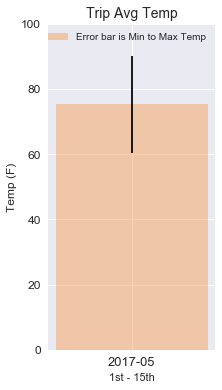

In [111]:
#Plot the total Avg Temp for My Trip
plt.figure(figsize=[3, 6])

totalavg_plt = plt.bar('2017-05', totalavg, yerr=15, color='sandybrown', alpha=.5, label='Error bar is Min to Max Temp')
#pmax = plt.bar(p3_date, p3_tmax)

plt.ylabel('Temp (F)', fontsize=12)
plt.xlabel('1st - 15th')
plt.title('Trip Avg Temp', fontsize=14)
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(np.arange(0, 120, 20), fontsize=12)

plt.show()

In [ ]:
#Optional Analysis
#Calculate the rainfall per weather station using the previous year's matching dates


In [ ]:
# Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

# Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.
# Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
# Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
# Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [ ]:
# Now that you have completed your initial analysis, design a Flask api based on the queries that you have just developed.

# Use FLASK to create your routes.
